# Calculating the evidence for the polynomial regression problem

What is the degree of polynomial M that maximizes the evidence?

Polynomial regression of synthetic data (sine wave + Gaussian noise) obtained from [here](http://research.microsoft.com/en-us/um/people/cmbishop/PRML/webdatasets/curvefitting.txt)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [2]:
data = np.loadtxt('../data/curvefitting.txt', dtype=str, delimiter=' ')

In [3]:
data = data.astype(np.float64)

In [4]:
x = data[:, 0]
t = data[:, 1]

In [5]:
# for plotting the sinusoid
x_test = np.linspace(0, 1, 100)
t_test = np.sin(2 * np.pi * x_test)

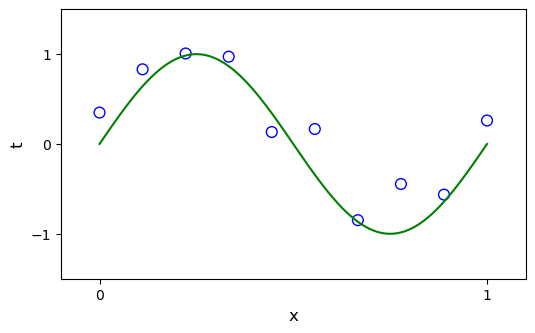

In [6]:
plt.figure(figsize=(6, 3.5))
plt.plot(x_test, t_test, 'g')  # ground truth sinusoid
plt.scatter(x, t, facecolors='none', edgecolors='b', s=60)
plt.xlim([-0.1, 1.1])
plt.ylim([-1.5, 1.5])
plt.xticks(ticks=[0, 1])
plt.yticks(ticks=[-1, 0, 1])
plt.xlabel('x', fontsize=12)
plt.ylabel('t', fontsize=12)
plt.show()

## Polynomial curve fitting

In [7]:
alpha = 5e-3  # mentioned in teh text (p.167)

In [8]:
deg = 1  # degree of the polynomial
M = deg + 1  # include the bias terms

In [9]:
def create_design_matrix(x, M):
    """create a design matrix for polynomial regression
    
    Args:
        x (np.array): observations (N, )
        M (int): number of paramters including the bias
    
    Returns:
        Phi (np.array): design matrix in PRML (3.16), (N, M)
    """
    
    Phi = []
    for m in range(M):
        Phi.append(x ** m)
    Phi = np.array(Phi).T  # (N, M)
    
    return Phi

# Line by line

In [10]:
beta = 1. / (0.3 ** 2)  # using the ground truth value of sigma=0.3 mentioned in Appendix A
beta

11.11111111111111

In [11]:
M = 4

In [12]:
N = x.shape[0]  # number of data points 
N

10

In [13]:
Phi = create_design_matrix(x, M)
Phi.shape

(10, 4)

In [14]:
S_N = np.linalg.pinv(alpha * np.eye(M) + beta * Phi.T @ Phi)  # improve the numerical stability here!
m_N = beta * S_N @ Phi.T @ t  # (3.53)

In [15]:
m_N

array([  0.46132488,   5.77793765, -19.84845365,  13.75092052])

In [16]:
A = alpha * np.eye(M) + beta * Phi.T @ Phi  # (3.54)
(sign, logabsdet) = np.linalg.slogdet(A)

In [17]:
E = (beta / 2) * np.linalg.norm((t - Phi @ m_N), ord=2) ** 2 + (alpha / 2) * m_N.T @ m_N  # (3.82)
E

3.9171545070210287

In [18]:
log_evidence = (M / 2) * np.log(alpha) + (N / 2) * np.log(beta) - E - (1. / 2) * sign * logabsdet - (N / 2) * np.log(2 * np.pi)  # (3.86)
log_evidence 

-13.933370482940083

In [19]:
def log_evidence(M):
    Phi = create_design_matrix(x, M)
    S_N = np.linalg.pinv(alpha * np.eye(M) + beta * Phi.T @ Phi) 
    m_N = beta * S_N @ Phi.T @ t  # (3.53)
    A = alpha * np.eye(M) + beta * Phi.T @ Phi  # (3.54)
    
    (sign, logabsdet) = np.linalg.slogdet(A)
    E = (beta / 2) * np.linalg.norm((t - Phi @ m_N), ord=2) ** 2 + (alpha / 2) * m_N.T @ m_N  # (3.82)
    log_evidence = (M / 2) * np.log(alpha) + (N / 2) * np.log(beta) - E - (1. / 2) * sign * logabsdet - (N / 2) * np.log(2 * np.pi)  # (3.86)
    return log_evidence

In [20]:
M_list = range(1, 11)
result = []
for M in M_list:
    result.append(log_evidence(M))

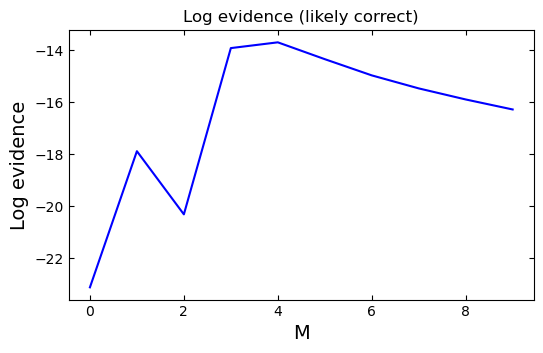

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
ax.plot(np.array(M_list) - 1, result, 'b')
ax.tick_params(labelsize=10, direction='in', which='both', right=True, top=True)
ax.set_xlabel('M', fontsize=14)
ax.set_ylabel('Log evidence', fontsize=14)
ax.set_title('Log evidence (likely correct)')
plt.show()

# Figure 3.14: possibly contains a bug?

Several people have pointed out that they cannot reproduce Fig. 13 ([Shuyo](https://shuyo.hatenablog.com/entry/20090715/evidence), [Sage](http://www.pwv.co.jp/~take/TakeWiki/index.php?sage%2FPRML-%20%E3%82%A8%E3%83%93%E3%83%87%E3%83%B3%E3%82%B9%E8%BF%91%E4%BC%BC)). `Sage` suspected that the authors might have used `norm(A)` instead of `det(A)`. This change indeed makes it more similar to Fig. 3.14!). One person suspected that the authors might have used `norm(A)` instead of `det(A)`. This change indeed makes it more similar to Fig. 3.14!

In [22]:
def log_evidence_typo(M):
    Phi = create_design_matrix(x, M)
    S_N = np.linalg.pinv(alpha * np.eye(M) + beta * Phi.T @ Phi) 
    m_N = beta * S_N @ Phi.T @ t  # (3.53)
    A = alpha * np.eye(M) + beta * Phi.T @ Phi  # (3.54)
    
    #(sign, logabsdet) = np.linalg.slogdet(A)
    E = (beta / 2) * np.linalg.norm((t - Phi @ m_N), ord=2) ** 2 + (alpha / 2) * m_N.T @ m_N  # (3.82)
    log_evidence = (M / 2) * np.log(alpha) + (N / 2) * np.log(beta) - E - (1. / 2) * np.log(np.linalg.norm(A)) - (N / 2) * np.log(2 * np.pi)  # (3.86)
    return log_evidence

In [23]:
M_list = range(1, 11)
result = []
for M in M_list:
    result.append(log_evidence_typo(M))

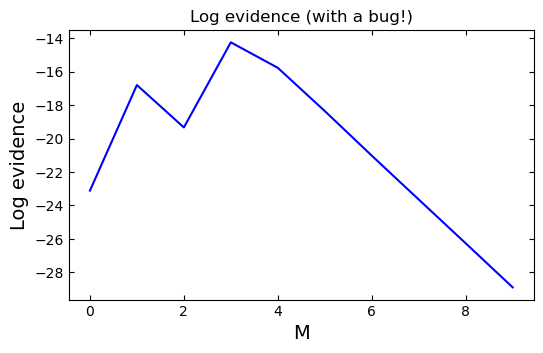

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
ax.plot(np.array(M_list) - 1, result, 'b')
ax.tick_params(labelsize=10, direction='in', which='both', right=True, top=True)
ax.set_xlabel('M', fontsize=14)
ax.set_ylabel('Log evidence', fontsize=14)
ax.set_title('Log evidence (with a bug!)')
plt.show()